In [ ]:
# Import the dependencies
from keras.models import Sequential # Initialize ANN
from keras.layers import Dense # Tell us the number of layers, neurons
from sklearn.model_selection import train_test_split # To split the data into training and testing sets
#from sklearn.preprocessing import MinMaxScaler # To scale the data
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload() # Upload the data
df = pd.read_csv('new.csv') # Load the data
df.head(7) # Print the first 7 rows of data

Saving new.csv to new (2).csv


,TeamExp,ManagerExp,Length,Entities,Language,Effort
0,1,4,12,52,1,5152
1,0,0,4,124,1,5635
2,4,4,1,60,1,805
3,0,0,5,119,1,3829
4,0,0,4,94,1,2149
5,0,0,4,89,1,2821
6,2,1,9,42,2,2569


In [ ]:
# Convert the data into an array
dataset = df.values
dataset

array([[    1,     4,    12,    52,     1,  5152],
       [    0,     0,     4,   124,     1,  5635],
       [    4,     4,     1,    60,     1,   805],
       [    0,     0,     5,   119,     1,  3829],
       [    0,     0,     4,    94,     1,  2149],
       [    0,     0,     4,    89,     1,  2821],
       [    2,     1,     9,    42,     2,  2569],
       [    1,     2,    13,    52,     1,  3913],
       [    3,     1,    12,    88,     1,  7854],
       [    3,     4,     4,    38,     1,  2422],
       [    4,     1,    21,    99,     1,  4067],
       [    2,     1,    17,   112,     1,  9051],
       [    1,     1,     3,    72,     1,  2282],
       [    3,     4,     8,    61,     1,  4172],
       [    4,     4,     9,   121,     1,  4977],
       [    3,     2,     8,    48,     2,  1617],
       [    4,     3,     8,    43,     1,  3192],
       [    4,     4,    14,   316,     2,  3437],
       [    3,     4,    14,   386,     2,  4494],
       [    4,     2,     5,   

In [ ]:
# Split the dataset into independent and dependent datasets
X = dataset[:, 0:5] # Get all the rows from the columns [0, 5)

Y = dataset[:, 5] # Get all the rows from columns at position 5 (the 6th column)


In [ ]:
# Use the min-max scaler method from preprocesing which scales the dataset so that all
# the features lie between 0 and 1 inclusive

#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(X)

X_scale

array([[-0.93064538,  0.92221087,  0.0451754 , -0.83376273, -0.79056942],
       [-1.68446813, -1.72200437, -1.03903409,  0.01975741, -0.79056942],
       [ 1.33082289,  0.92221087, -1.44561264, -0.73892716, -0.79056942],
       [-1.68446813, -1.72200437, -0.9035079 , -0.03951482, -0.79056942],
       [-1.68446813, -1.72200437, -1.03903409, -0.33587598, -0.79056942],
       [-1.68446813, -1.72200437, -1.03903409, -0.39514821, -0.79056942],
       [-0.17682262, -1.06095056, -0.36140316, -0.95230719,  0.63245553],
       [-0.93064538, -0.39989675,  0.18070158, -0.83376273, -0.79056942],
       [ 0.57700013, -1.06095056,  0.0451754 , -0.40700266, -0.79056942],
       [ 0.57700013,  0.92221087, -1.03903409, -0.99972498, -0.79056942],
       [ 1.33082289, -1.06095056,  1.26491106, -0.27660375, -0.79056942],
       [-0.17682262, -1.06095056,  0.72280632, -0.12249595, -0.79056942],
       [-0.93064538, -1.06095056, -1.17456027, -0.5966738 , -0.79056942],
       [ 0.57700013,  0.92221087, -0.4

In [ ]:
# Split the data into 80% training and 20% (testing(10%) and validating(10%) )
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
# The training set has 1600 data points while he validation and test set have 200 data points each.
# The X variables have 42 input features
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(64, 5) (8, 5) (9, 5) (64,) (8,) (9,)


In [ ]:
# Build the model and architecture of the DNN
model = Sequential() # Initalizes de ANN
model.add(Dense(40, activation='sigmoid', input_dim=5))
model.add(Dense(1, activation='linear'))

In [ ]:
# Loss function measures how well the model did on traingn and then tries to improve using the optimizer

model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
# Train the model
hist = model.fit(
    X_train, Y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, Y_val)
)

Train on 64 samples, validate on 8 samples
Epoch 1/100
64/64 [==============================] - 0s 659us/step - loss: 35409956.5000 - val_loss: 39141160.0000
Epoch 2/100
64/64 [==============================] - 0s 75us/step - loss: 26352255.0000 - val_loss: 31269484.0000
Epoch 3/100
64/64 [==============================] - 0s 78us/step - loss: 23512443.0000 - val_loss: 26406780.0000
Epoch 4/100
64/64 [==============================] - 0s 84us/step - loss: 21951603.7500 - val_loss: 24423728.0000
Epoch 5/100
64/64 [==============================] - 0s 107us/step - loss: 20632702.5000 - val_loss: 22361664.0000
Epoch 6/100
64/64 [==============================] - 0s 93us/step - loss: 19846924.0000 - val_loss: 19910092.0000
Epoch 7/100
64/64 [==============================] - 0s 83us/step - loss: 18713947.0000 - val_loss: 19141116.0000
Epoch 8/100
64/64 [==============================] - 0s 126us/step - loss: 17994851.0000 - val_loss: 18130636.0000
Epoch 9/100
64/64 [=======================

In [ ]:
model.evaluate(X_train, Y_train)

64/64 [==============================] - 0s 111us/step


39000177.0

In [ ]:
# Make a prediction
prediction = model.predict(X_test)
print(prediction)
print(Y_test)
#print(X_test.shape)
#print(type(X_test))

[[11709.968 ]
 [ 6881.619 ]
 [ 4519.789 ]
 [ 2572.2515]
 [ 3650.0522]
 [ 6719.6323]
 [ 9000.803 ]
 [ 2861.4233]
 [ 2779.6995]]
[14987  8050  5635  2821  5880 14973  9100  2422  3136]


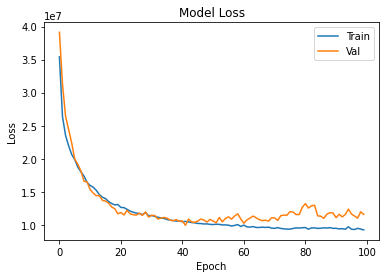

In [ ]:
# Visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

In [ ]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#   json_file.write(model_json)
 
# serialize weights to HDF5
#model.save_weights("model.h5")
model.save("full.h5")
print("Saved model to disk")
from google.colab import files
#files.download("model.json")
#files.download("model.h5")
files.download("full.h5")

Saved model to disk


In [ ]:
print(model.summary())

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 40)                240       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 41        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
None
